<a href="https://colab.research.google.com/github/Ruthnguli/Exploratory-Data-Analysis/blob/main/Dsc_Core_13_Moringa_School_Week_2_IP_Ruth_Nguli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis : Univariate, Bivariate and Multivariate

## 1. Defining the Question

### a) Specifying the Data Analytic Question

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# load our dataset from the provided url
# dataset url: http://bit.ly/FinancialDataset
financial_dataset =pd.read_csv("http://bit.ly/FinancialDataset")



## 3. Checking the Data

In [73]:
#Determining number of records in the dataset

financial_dataset.shape

(23524, 13)

In [74]:
#preveiwing the top og the data

financial_dataset.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [75]:
#preveiwing the bottom of the data
financial_dataset.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [76]:
#checking if the data has appropriate datatype
financial_dataset.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [77]:
#finding out the columns name
financial_dataset.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

## 4. Validating the Dataset

In [ ]:
#Dropping unwanted columns 
financial_dataset.drop(['uniqueid','Cell Phone Access'], axis='columns', inplace=True)

In [84]:
#Renaming the columns 
financial_dataset = financial_dataset.rename(columns={"Has a Bank account": "Bank_account", "Type of Location": "Location_type", "Respondent Age": "Age",
                                            "The relathip with head": "Household_role", "Level of Educuation": "Education_level", "Type of Job": "Employment"})
financial_dataset.head()

,country,year,Bank_account,Location_type,household_size,Age,gender_of_respondent,Household_role,marital_status,Education_level,Employment
0,Kenya,2018,Yes,Rural,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [85]:
#encoding some columns values to have them in numerical

from sklearn.preprocessing import LabelEncoder

print(financial_dataset['Bank_account'].unique())
print(financial_dataset['gender_of_respondent'].unique())
print(financial_dataset['Household_role'].unique())
print(financial_dataset['Education_level'].unique())
print(financial_dataset['Employment'].unique())

['Yes' 'No' nan]
['Female' 'Male' nan]
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6' nan]
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' nan 'No Income']


In [97]:
#identifying and Drop null values before encoding to avoid them being encoded as well
financial_dataset.isnull().sum()
financial_df = financial_dataset.dropna()
financial_df

,country,year,Bank_account,Location_type,household_size,Age,gender_of_respondent,Household_role,marital_status,Education_level,Employment,Bank_Account
0,Kenya,2018,Yes,Rural,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,No,Rural,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,0
2,Kenya,2018,Yes,Urban,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1
3,Kenya,2018,No,Rural,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0
4,Kenya,2018,No,Urban,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,0
23520,Uganda,2018,No,Rural,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income,0
23521,Uganda,2018,No,Rural,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income,0
23522,Uganda,2018,No,Urban,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed,0


In [98]:
#viewing te unique values to confirm no na values
print(financial_df['Bank_account'].unique())
print(financial_df['gender_of_respondent'].unique())
print(financial_df['Household_role'].unique())
print(financial_df['Education_level'].unique())
print(financial_df['Employment'].unique())

['Yes' 'No']
['Female' 'Male']
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6']
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']


In [108]:
#encoding Employment type column 
Employment_encoder=LabelEncoder()
financial_df["Employment_Type"] = LabelEncoder().fit_transform(financial_df["Employment"])
financial_df[["Employment", "Employment_Type"]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Employment,Employment_Type
0,Self employed,9
1,Government Dependent,4
2,Self employed,9
3,Formally employed Private,3
4,Informally employed,5
...,...,...
23519,Other Income,7
23520,Other Income,7
23521,Other Income,7
23522,Self employed,9


In [103]:
#encoding Education level column 
Education_encoder=LabelEncoder()
financial_df["Education_Level"] = LabelEncoder().fit_transform(financial_df["Education_level"])
financial_df[["Education_level", "Education_Level"]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Education_level,Education_Level
0,Secondary education,4
1,No formal education,1
2,Vocational/Specialised training,6
3,Primary education,3
4,Primary education,3
...,...,...
23519,No formal education,1
23520,Secondary education,4
23521,Primary education,3
23522,Secondary education,4


In [102]:
#encoding Household role column 
Household_encoder=LabelEncoder()
financial_df["Household_Role"] = LabelEncoder().fit_transform(financial_df["Household_role"])
financial_df[["Household_role", "Household_Role"]]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Household_role,Household_Role
0,Spouse,5
1,Head of Household,1
2,Other relative,3
3,Head of Household,1
4,Child,0
...,...,...
23519,Head of Household,1
23520,Head of Household,1
23521,Parent,4
23522,Parent,4


In [99]:
#encoding Bank account column 
account_encoder=LabelEncoder()
financial_df["Bank_Account"] = LabelEncoder().fit_transform(financial_df["Bank_account"])
financial_df[["Bank_account", "Bank_Account"]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Bank_account,Bank_Account
0,Yes,1
1,No,0
2,Yes,1
3,No,0
4,No,0
...,...,...
23519,No,0
23520,No,0
23521,No,0
23522,No,0


In [109]:
#confirm the new uniques values of encoded columns
print(financial_df['Bank_Account'].unique())
print(financial_df['Household_Role'].unique())
print(financial_df['Education_Level'].unique())
print(financial_df['Employment_Type'].unique())

[1 0]
[5 1 3 0 4 2]
[4 1 6 3 5 2 0]
[9 4 3 5 2 1 8 7 0 6]


## 5. Tyding the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


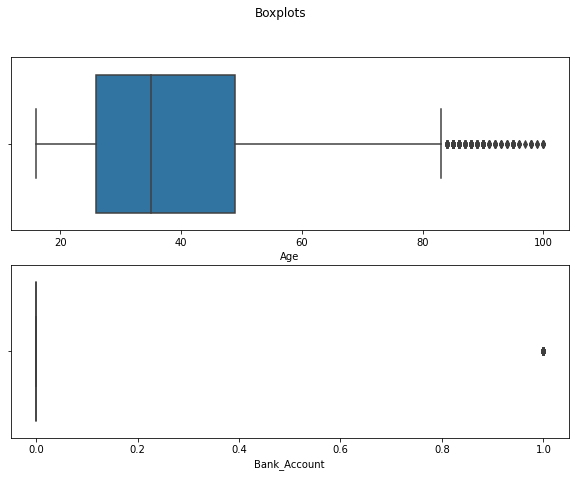

In [114]:
# Checking for Outliers
fig, ((ax1, ax2)) = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Boxplots')

sns.boxplot(financial_df['Age'], ax=ax1)
sns.boxplot(financial_df['Bank_Account'], ax=ax2)


In [116]:
# Checking for Anomalies
#
q1_A, q3_A = np.percentile(financial_df['Bank_Account'], [25, 75]) 

iqr = q3_A - q1_A

l_bound = q1_A - (1.5*iqr)
u_bound = q3_A + (1.5 * iqr)

#print(iqr_r, iqr)
print(l_bound, u_bound)

0.0 0.0


In [115]:
#checking anomalies
q1_r, q3_r = np.percentile(financial_df['Age'], [25, 75]) 

iqr = q3_r - q1_r

l_bound = q1_r - (1.5*iqr)
u_bound = q3_r + (1.5 * iqr)

#print(iqr_r, iqr)
print(l_bound, u_bound)

-8.5 83.5


In [117]:
# Dealing with the Missing Data
#
financial_df.isnull().sum()

country                 0
year                    0
Bank_account            0
Location_type           0
household_size          0
Age                     0
gender_of_respondent    0
Household_role          0
marital_status          0
Education_level         0
Employment              0
Bank_Account            0
Household_Role          0
Education_Level         0
Employment_Type         0
dtype: int64

In [118]:
#checking duplicates
financial_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23343, dtype: bool

## 6(a) Univaraite Analysis

In [ ]:
#looking at the dataset statistics
financial_df[['Bank_Account','household_size','Age','Household_Role', 'Education_Level','Employment_Type']].describe()

,Bank_Account,household_size,Age,Household_Role,Education_Level,Employment_Type
count,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000
mean,0.141241,3.688643,38.805509,2.215996,2.994645,5.425352
std,0.348278,2.281184,16.519803,1.893657,1.208854,3.089847
min,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,26.000000,1.000000,3.000000,2.000000
50%,0.000000,3.000000,35.000000,1.000000,3.000000,5.000000
75%,0.000000,5.000000,49.000000,5.000000,4.000000,9.000000
max,1.000000,21.000000,100.000000,5.000000,6.000000,9.000000


In [ ]:
#finding the mode for year , household and Age


print("\n....................Calculate mode.....................\n")
financial_df[['Bank_Account','household_size','Age','Household_Role', 'Education_Level','Employment_Type']].mode()


....................Calculate mode.....................



,Bank_Account,household_size,Age,Household_Role,Education_Level,Employment_Type
0,0,2.0,30.0,1,3,9


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

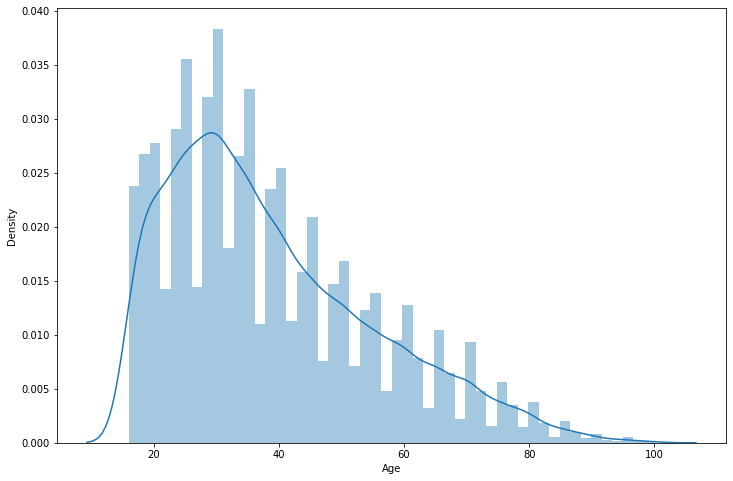

In [ ]:
#checking skewness by looking at the age of interviewee
plt.figure(figsize=(12, 8))
sns.distplot(financial_df['Age'], hist=True)
plt.show


#The data has a positive skew

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

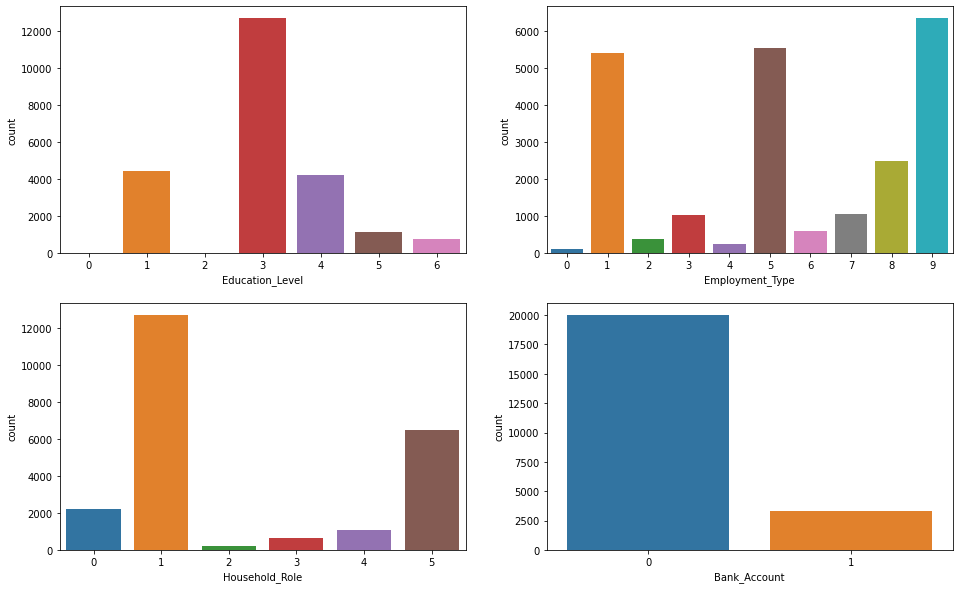

In [140]:
#Analyzing one veriable

fig,axes = plt.subplots(2,2, figsize=(16,10))
sns.countplot('Education_Level',data=financial_df,ax=axes[0,0])
sns.countplot('Employment_Type',data=financial_df,ax=axes[0,1])
sns.countplot('Household_Role',data=financial_df,ax=axes[1,0])
sns.countplot('Bank_Account',data=financial_df,ax=axes[1,1])


In [144]:
#Frequency of each category
data = pd.crosstab(index=financial_df['Employment_Type'], columns=['Relative Frequency'])
data/data.sum()

col_0,Relative Frequency
Employment_Type,
0,0.005355
1,0.232275
2,0.016536
3,0.044896
4,0.010581
5,0.237759
6,0.026475
7,0.046138
8,0.107484


In [145]:
#Frequency of each category
data = pd.crosstab(index=financial_df['Education_Level'], columns=['Relative Frequency'])
data/data.sum()

col_0,Relative Frequency
Education_Level,
0,0.001157
1,0.191364
2,0.000343
3,0.543589
4,0.180225
5,0.049008
6,0.034314


In [146]:
#Frequency of each category
data = pd.crosstab(index=financial_df['Bank_Account'], columns=['Relative Frequency'])
data/data.sum()

col_0,Relative Frequency
Bank_Account,
0,0.858759
1,0.141241


## 6(b). Bivariate Analysis

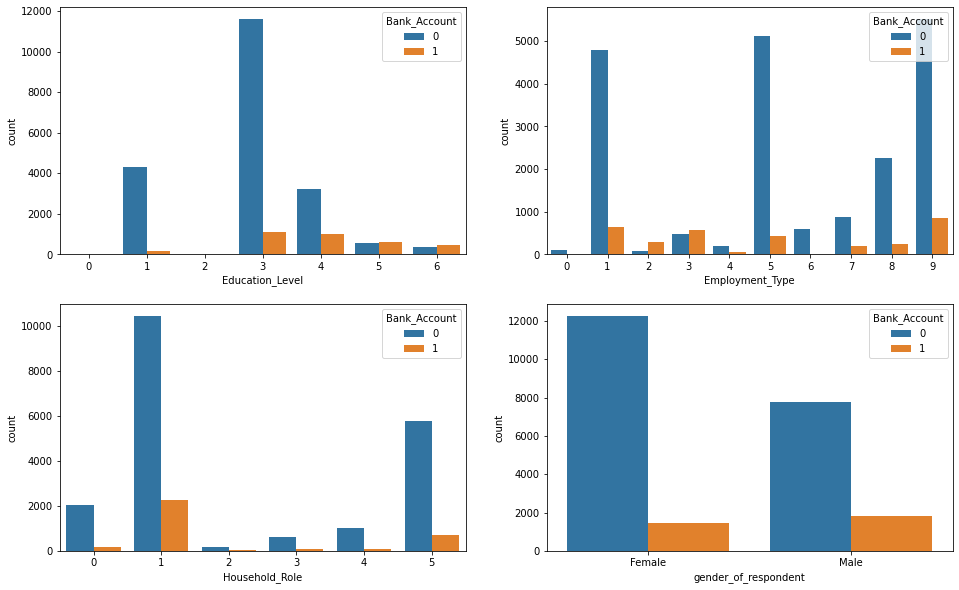

In [151]:
#Finding the relationship of different variables with having Bank account 
fig,axes = plt.subplots(2,2, figsize=(16,10))
sns.countplot(x='Education_Level',hue='Bank_Account',data=financial_df,ax=axes[0,0])
sns.countplot(x='Employment_Type',hue='Bank_Account',data=financial_df,ax=axes[0,1])
sns.countplot(x='Household_Role',hue='Bank_Account',data=financial_df,ax=axes[1,0])
sns.countplot(x='gender_of_respondent',hue='Bank_Account',data=financial_df,ax=axes[1,1])

In [157]:
#Two variable analysis
df = pd.crosstab(financial_df['Employment_Type'], financial_df['Bank_Account'])
df

Bank_Account,0,1
Employment_Type,,
0,111,14
1,4788,634
2,87,299
3,481,567
4,197,50
5,5110,440
6,605,13
7,881,196
8,2269,240


<function matplotlib.pyplot.show>

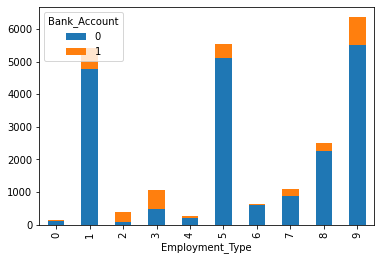

In [158]:
#visual representation of the above frequency
df.plot.bar(stacked=True)
plt.show

#people without bank accounts make up the most part of the stack across.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


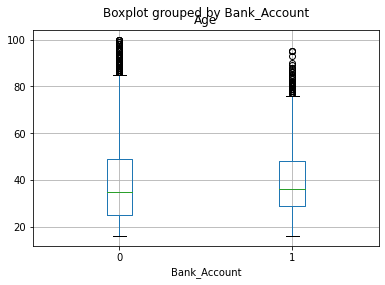

In [170]:
## Bank account corresponding to Age
financial_df.boxplot(column="Age",by="Bank_Account")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


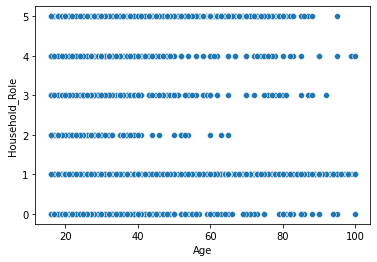

In [171]:
#comparing age and education Household Role
sns.scatterplot(financial_df['Age'],financial_df['Household_Role'])

In [173]:

# Calculating the pearson coefficient
pearson_coeff = financial_df["Bank_Account"].value_counts().corr(financial_df["Age"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = financial_df["Bank_Account"].value_counts().corr(financial_df["household_size"]) 
print(coeff)

# any reading between 0 and -1 means that the two securities move in opposite directions.
# The correlation coefficient is calculated to be -1.  This strong negative correlation signifies 
# that as the Variables are moving in opposite direction, as one increases the other decreases.

-1.0
-0.9999999999999999


## 6(c). Multuvariate Analysis

<function matplotlib.pyplot.show>

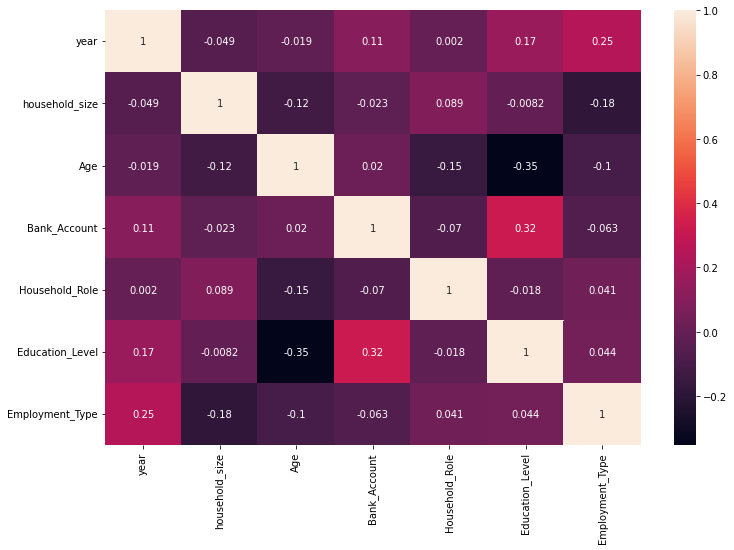

In [174]:
#finding the correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(financial_df.corr(),annot=True)
plt.show

#There is a positive correlation between Education and bank account and Employment type. Household size i negatively correlated toEducation level and Education level.

<function matplotlib.pyplot.show>

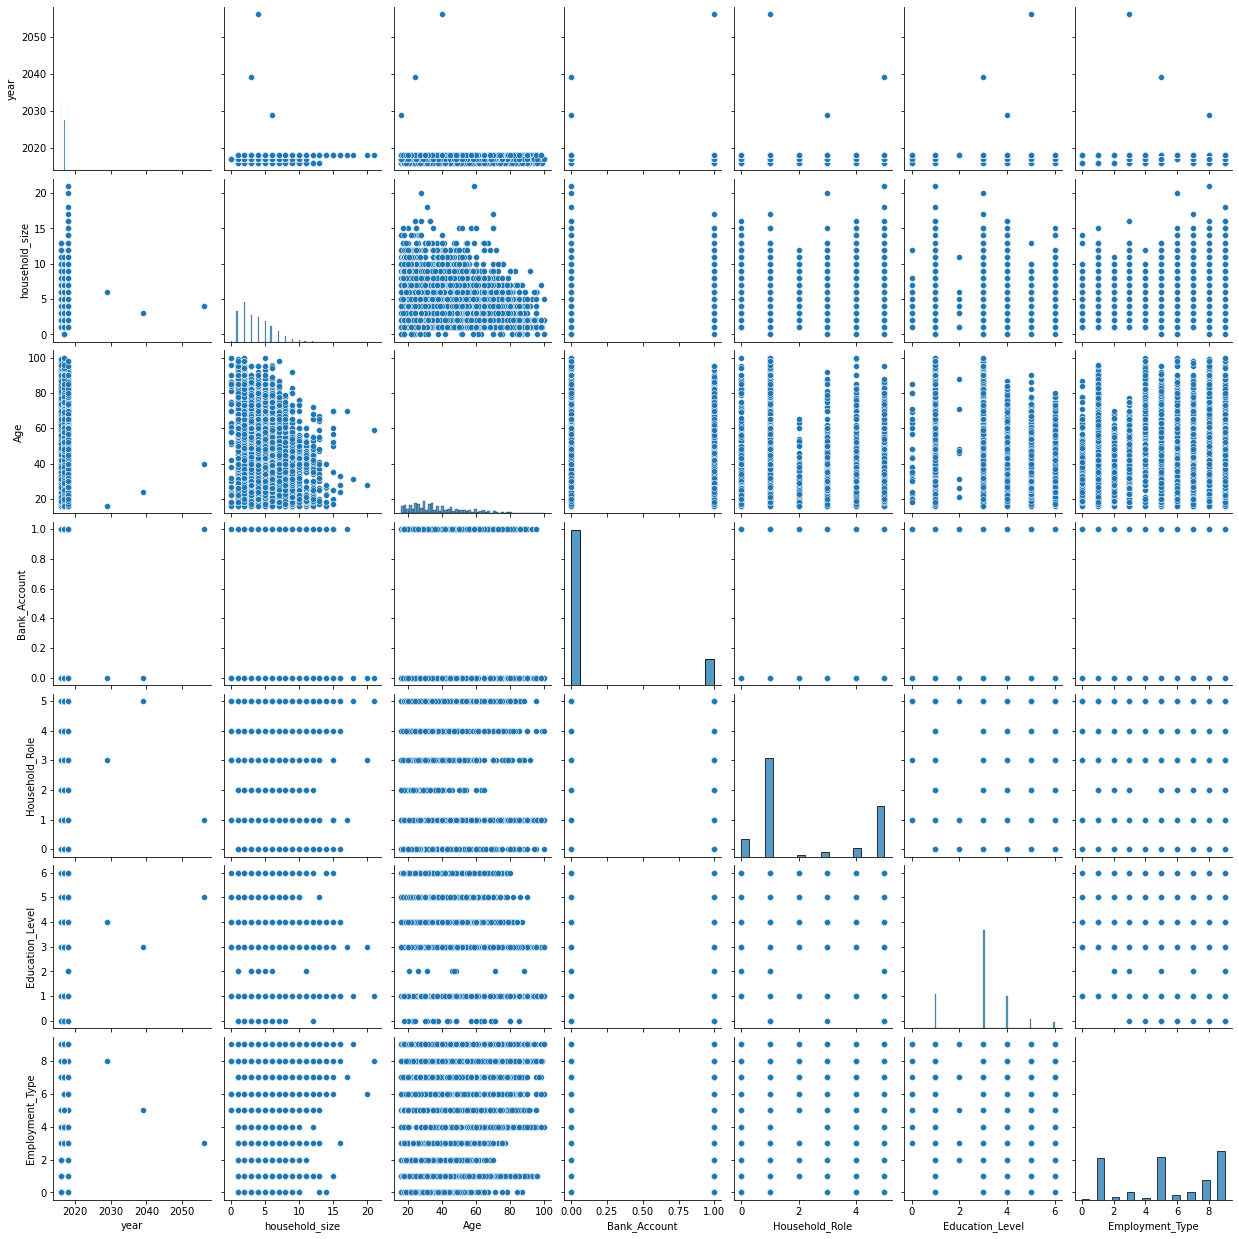

In [175]:
#finding the correlation of variables
sns.pairplot(financial_df)
plt.show

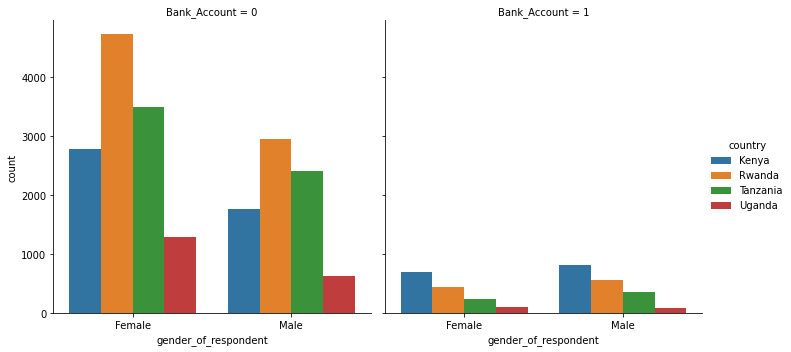

In [185]:
#Finding how different countries and gender arerelated to account opening

sns.catplot(data=financial_df,col = "Bank_Account",x = "gender_of_respondent", hue="country",kind = "count")


#Kenyan women and men are most likely to open bank accounts.

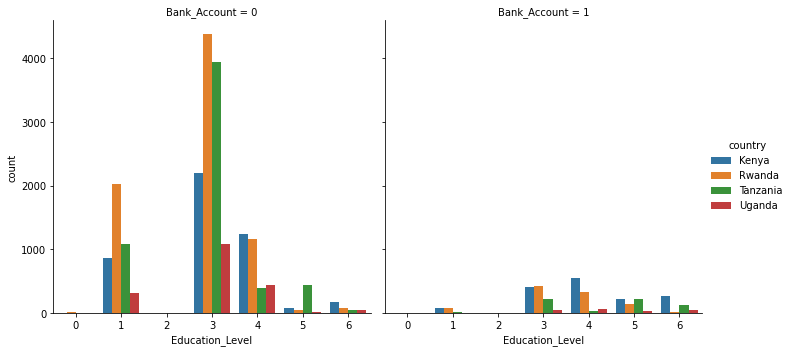

In [188]:
#Finding how different countries and Education Level are related to account opening

sns.catplot(data=financial_df,col = "Bank_Account",x = "Education_Level", hue="country",kind = "count")

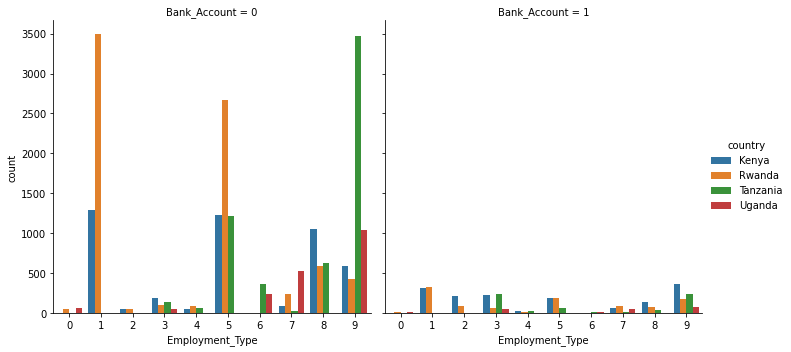

In [189]:
#Finding how different countries and Employment Type are related to account opening

sns.catplot(data=financial_df,col = "Bank_Account",x = "Employment_Type", hue="country",kind = "count")